In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import Image
import os

In [2]:
plt.style.use("seaborn-v0_8-darkgrid")

In [3]:
import warnings
# filter warnings
warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
data = pd.read_csv("C:\\code\\anameia.csv")

In [5]:
data.head()

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
0,NaN,NaN,NaN,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,NaN,Red Cell Distribution width,"White Blood Cell (WBC count),",Platelet,Hemoglobin
1,1.0,28.0,0.0,5.66,34,60.1,17,28.2,20,11.1,128.3,9.6
2,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13,7.02,419,13.8
3,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13,8.09,325,13.4
4,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264,11.3


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S. No.     364 non-null    float64
 1   Age        364 non-null    float64
 2   Sex        364 non-null    float64
 3     RBC      365 non-null    object 
 4   PCV        365 non-null    object 
 5   MCV        365 non-null    object 
 6   MCH        365 non-null    object 
 7    MCHC      364 non-null    float64
 8    RDW       365 non-null    object 
 9   TLC        365 non-null    object 
 10   PLT /mm3  365 non-null    object 
 11   HGB       365 non-null    object 
dtypes: float64(4), object(8)
memory usage: 34.3+ KB


In [7]:
data.describe()

,S. No.,Age,Sex,MCHC
count,364.000000,364.000000,364.000000,364.000000
mean,182.500000,44.917582,0.442308,32.053407
std,105.221988,18.780854,0.497344,2.801790
min,1.000000,11.000000,0.000000,23.600000
25%,91.750000,28.000000,0.000000,30.300000
50%,182.500000,44.500000,0.000000,31.700000
75%,273.250000,60.000000,1.000000,33.300000
max,364.000000,89.000000,1.000000,50.200000


In [8]:
data = data.copy()

In [22]:
data.head()

,S.No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT/mm3,HGB
1,1.0,28.0,0.0,5.66,34,60.1,17,28.2,20,11.1,128.3,9.6
2,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13,7.02,419,13.8
3,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13,8.09,325,13.4
4,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264,11.3
5,5.0,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196,11.5


In [23]:
print(data.columns)

Index(['S.No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC',
       'PLT/mm3', 'HGB'],
      dtype='object')


In [24]:
data.columns = data.columns.str.replace(' ', '')
print(data.columns)

Index(['S.No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC',
       'PLT/mm3', 'HGB'],
      dtype='object')


# Extracting  

In [34]:
filtered_data = data.dropna(inplace=False)  # Use inplace=False to return a new DataFrame
data = filtered_data.copy()

In [35]:
filtered_data.describe()

,index,S.No.,Age,Sex,MCHC
count,338.000000,338.000000,338.000000,338.000000,338.000000
mean,185.857988,185.857988,47.251479,0.455621,32.092988
std,105.149790,105.149790,17.413936,0.498765,2.823787
min,1.000000,1.000000,18.000000,0.000000,23.600000
25%,97.250000,97.250000,31.250000,0.000000,30.300000
50%,188.500000,188.500000,47.000000,0.000000,31.700000
75%,275.750000,275.750000,60.000000,1.000000,33.300000
max,364.000000,364.000000,89.000000,1.000000,50.200000


In [36]:
len(filtered_data)

338

In [37]:
data.drop(filtered_data[filtered_data['Age'] < 18].index,inplace=True)
filtered_data.drop(filtered_data[filtered_data['Age'] < 18].index,inplace=True)
filtered_data.reset_index(inplace=True)
data.reset_index(inplace=True)

In [38]:
len(filtered_data)

338

# changing the data to float 

In [39]:
filtered_data = filtered_data.astype("float64")

In [40]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   level_0  338 non-null    float64
 1   index    338 non-null    float64
 2   S.No.    338 non-null    float64
 3   Age      338 non-null    float64
 4   Sex      338 non-null    float64
 5   RBC      338 non-null    float64
 6   PCV      338 non-null    float64
 7   MCV      338 non-null    float64
 8   MCH      338 non-null    float64
 9   MCHC     338 non-null    float64
 10  RDW      338 non-null    float64
 11  TLC      338 non-null    float64
 12  PLT/mm3  338 non-null    float64
 13  HGB      338 non-null    float64
dtypes: float64(14)
memory usage: 37.1 KB


# Grouping the Data

In [41]:
filtered_data.columns

Index(['level_0', 'index', 'S.No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH',
       'MCHC', 'RDW', 'TLC', 'PLT/mm3', 'HGB'],
      dtype='object')

In [42]:
filtered_data["HGB"]=[(2 if filtered_data["HGB"][item] >15 else 0 if filtered_data["HGB"][item] < 12 else 1) if filtered_data["Sex"][item] == 0.0 else (2 if filtered_data["HGB"][item] >14 else 0 if filtered_data["HGB"][item] < 11 else 1) for item in range(len(filtered_data))]

In [43]:
filtered_data["HGB"]=[(2 if filtered_data["HGB"][item] >15 else 0 if filtered_data["HGB"][item] < 12 else 1) if filtered_data["Sex"][item] == 0.0 else (2 if filtered_data["HGB"][item] >14 else 0 if filtered_data["HGB"][item] < 11 else 1) for item in range(len(filtered_data))]

In [44]:
filtered_data["MCHC"]=[2 if item >38 else 0 if item < 30 else 1 for item in filtered_data["MCHC"]]

In [45]:
filtered_data["MCH"]=[2 if item >35 else 0 if item < 25 else 1 for item in filtered_data["MCH"]]

In [46]:
filtered_data["RDW"]=[2 if item >16 else 0 if item < 12.5 else 1 for item in filtered_data["RDW"]]

In [47]:
filtered_data["PLT/mm3"]=[2 if item >450 else 0 if item < 140 else 1 for item in filtered_data["PLT/mm3"]]

In [48]:
filtered_data["RBC"]=[2 if item >5.8 else 0 if item < 4 else 1 for item in filtered_data["RBC"]]

In [49]:
filtered_data["MCV"]=[2 if item >115 else 0 if item < 75 else 1 for item in filtered_data["MCV"]]

In [50]:
filtered_data["TLC"]=[2 if item >11 else 0 if item < 3 else 1 for item in filtered_data["TLC"]]

In [51]:
filtered_data["Age"]=[3 if item >64 else 2 if item > 48 else 1 if item>32 else 0 for item in filtered_data["Age"]]

In [52]:
filtered_data2=filtered_data.drop(["Age","Sex","S.No.","index"],axis=1,inplace=False)

In [54]:
filtered_data2.head()

,level_0,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT/mm3,HGB
0,0.0,1,34.0,0,0,0,2,2,0,0
1,1.0,1,44.5,1,1,1,1,1,1,0
2,2.0,1,41.6,1,1,1,1,1,1,0
3,3.0,1,36.7,1,1,1,1,2,1,0
4,4.0,1,36.9,1,1,1,1,1,1,0


In [55]:
def find_diagnose(feature):
    filtered_data2["diseased"]=[1 if filtered_data2[feature][item] == 0 or filtered_data2[feature][item] == 2 else filtered_data2["diseased"][item] for item in range(len(filtered_data2))]


In [56]:
filtered_data2["diseased"] = 0
for item in filtered_data2.columns:
    if(item!="diseased"):
        find_diagnose(item)

# Plotting

In [57]:
data["diseased"]=filtered_data2["diseased"]
filtered_data["diseased"]=filtered_data2["diseased"]
data = data.astype("float64")

In [58]:
data.head()

,level_0,index,S.No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT/mm3,HGB,diseased
0,0.0,1.0,1.0,28.0,0.0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6,1.0
1,1.0,2.0,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8,1.0
2,2.0,3.0,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4,1.0
3,3.0,4.0,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3,1.0
4,4.0,5.0,5.0,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5,1.0


In [59]:
corr=data.corr().drop(['S.No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC',
       'PLT/mm3', 'HGB'],axis=1)
corr=corr.drop(["diseased",'S.No.'],axis=0)

In [60]:
corr.head(corr.size)

,level_0,index,diseased
level_0,1.000000,0.999756,NaN
index,0.999756,1.000000,NaN
Age,-0.003168,-0.001488,NaN
Sex,0.108131,0.106251,NaN
RBC,-0.008601,-0.008885,NaN
PCV,0.008045,0.006406,NaN
MCV,-0.012358,-0.012648,NaN
MCH,0.148634,0.150259,NaN
MCHC,0.193616,0.197904,NaN
RDW,-0.122860,-0.124502,NaN


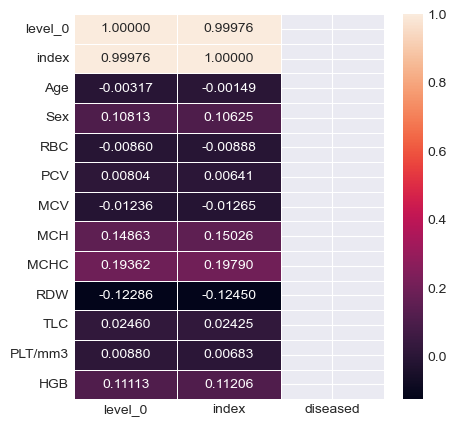

In [61]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.5f',ax=ax,)
plt.show()

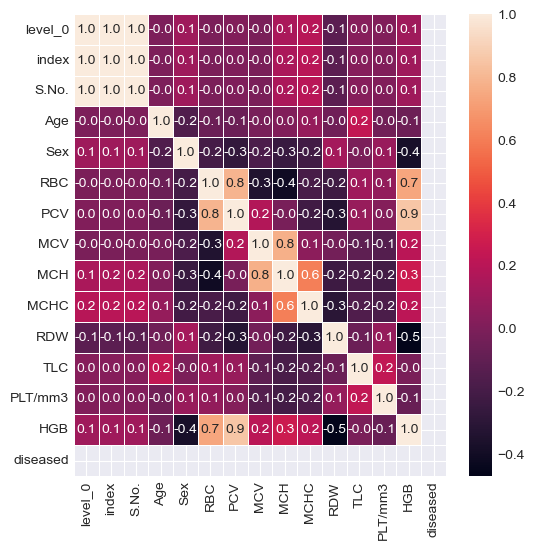

In [77]:
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,)
plt.show()

In [75]:
def scatter_plot(names):
    plt.scatter(data[names[0]][data["diseased"]==1],data[names[1]][data["diseased"]==1],color="red",alpha=0.5,label="diseased")
    plt.scatter(data[names[0]][data["diseased"]==0],data[names[1]][data["diseased"]==0],color="blue",alpha=0.6,label="not diseased")
    plt.xlabel(names[0])
    plt.ylabel(names[1])
    plt.legend()

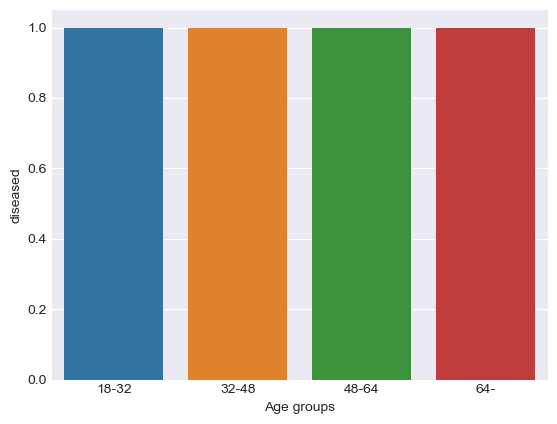

In [65]:
sns.barplot(filtered_data,x="Age",y="diseased")
plt.xticks(ticks=(0,1,2,3),labels=("18-32","32-48","48-64","64-"))
plt.xlabel("Age groups")
plt.ylabel("diseased")
plt.show()

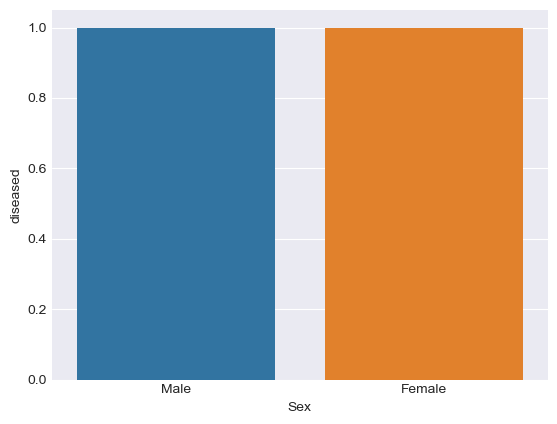

In [66]:
sns.barplot(data,x="Sex",y="diseased")
plt.xticks(ticks=(0,1),labels=("Male","Female"))
plt.xlabel("Sex")
plt.ylabel("diseased")
plt.show()

In [67]:
female_mild_anemia=filtered_data[(filtered_data.Sex==1.0) & (filtered_data.HGB==0)][filtered_data.columns[0]].count()
female_normal_anemia=filtered_data[(filtered_data.Sex==1.0) & (filtered_data.HGB==1)][filtered_data.columns[0]].count()
female_anemia=filtered_data[filtered_data.Sex==1.0]["S.No."].count()

print("when sex is female")
print("mild anemia count is :",female_mild_anemia)
print("normal anemia count is :",female_normal_anemia)
print("mild anemia count is :",female_mild_anemia/female_anemia)

when sex is female
mild anemia count is : 154
normal anemia count is : 0
mild anemia count is : 1.0


In [68]:
male_mild_anemia=filtered_data[(filtered_data.Sex==0.0) & (filtered_data.HGB==0)][filtered_data.columns[0]].count()
male_normal_anemia=filtered_data[(filtered_data.Sex==0.0) & (filtered_data.HGB==1)][filtered_data.columns[0]].count()
male_anemia=filtered_data[filtered_data.Sex==0.0]["S.No."].count()

print("when sex is male")
print("mild anemia count is :",male_mild_anemia)
print("normal anemia count is :",male_normal_anemia)
print("mild anemia count is :",male_mild_anemia/male_anemia)

when sex is male
mild anemia count is : 184
normal anemia count is : 0
mild anemia count is : 1.0


# Creating Model and Testing

In [69]:
y = filtered_data2.diseased

In [70]:
x = filtered_data2.drop(["diseased"],axis=1)

In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [72]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((236, 10), (102, 10), (236,), (102,))

# Testing the Model¶

In [73]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print("%",r2_score(y_test,y_pred)*100)

% 100.0


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

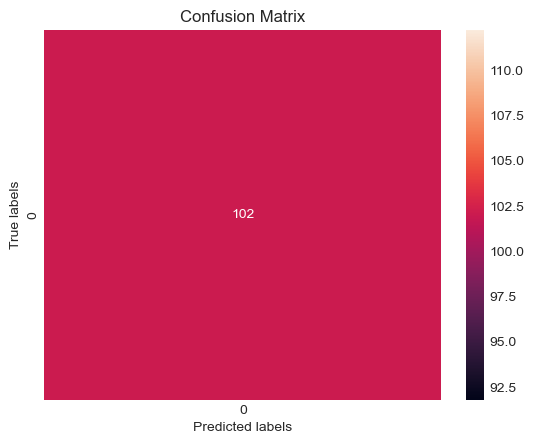

In [74]:
cm = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['diseased','not diseased']); ax.yaxis.set_ticklabels(['diseased','not diseased']);